In [1]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('data-midterm.csv')

# In kích thước của dữ liệu
print(df.shape)

(1000, 8)


In [5]:
from sklearn.linear_model import LinearRegression

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình với dữ liệu
X = df[['TimeToPlay', 'TimeToStudy']]
y = df['ProfessionalScore']
model.fit(X, y)

# Dự đoán ProfessionalScore
predicted_ProfessionalScore = model.predict([[7.0, 5.0]])

print(predicted_ProfessionalScore)

[1.97522192]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('data-midterm.csv')

# Tính mode của InterviewScore
mode_InterviewScore = df['InterviewScore'].mode()

print(mode_InterviewScore)

0    D
Name: InterviewScore, dtype: object


In [6]:
from sklearn.linear_model import LinearRegression

# Lọc dữ liệu cho nhóm 'Sexuality' là 'G' và 'Result' là 'NO'
df_filtered = df[(df['Sexuality'] == 'G') & (df['Result'] == 'NO')]

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình với dữ liệu
X = df_filtered[['TimeToStudy']]
y = df_filtered['ProfessionalScore']
model.fit(X, y)

# Dự đoán ProfessionalScore cho khoảng giá trị TimeToStudy từ min đến max
TimeToStudy_range = pd.DataFrame({'TimeToStudy': range(int(df_filtered['TimeToStudy'].min()), int(df_filtered['TimeToStudy'].max())+1)})
predicted_ProfessionalScore_range = model.predict(TimeToStudy_range)

print(predicted_ProfessionalScore_range)

[1.69689762 1.71821986 1.73954211 1.76086435 1.7821866  1.80350884
 1.82483109 1.84615333 1.86747558 1.88879782]


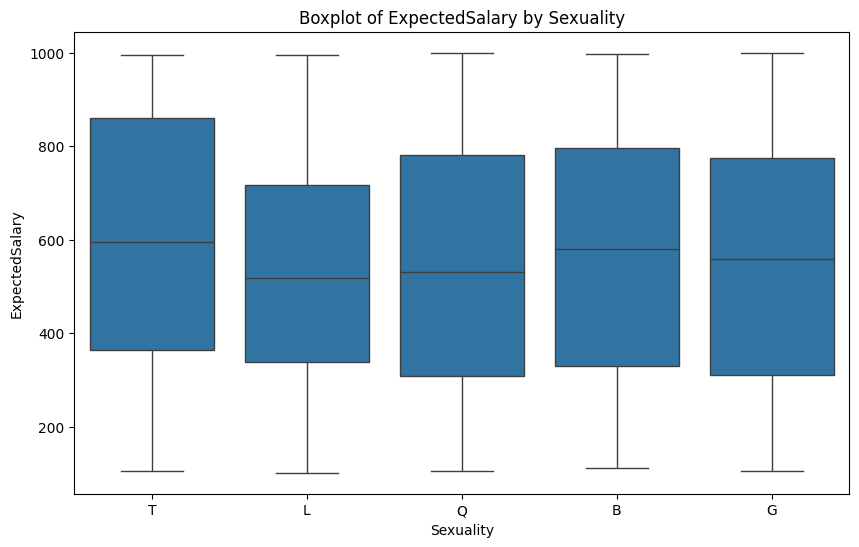

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexuality', y='ExpectedSalary', data=df)
plt.title('Boxplot of ExpectedSalary by Sexuality')
plt.show()

In [9]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('data-midterm.csv')

# Tính tương quan Pearson's
pearson_corr = df['TimeToPlay'].corr(df['TimeToStudy'])

print(pearson_corr)

0.0316539785199572


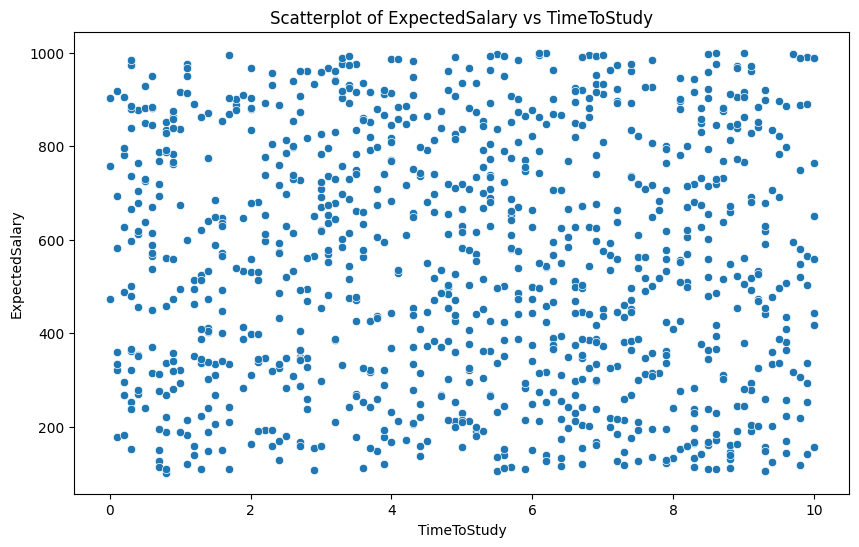

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TimeToStudy', y='ExpectedSalary', data=df)
plt.title('Scatterplot of ExpectedSalary vs TimeToStudy')
plt.show()

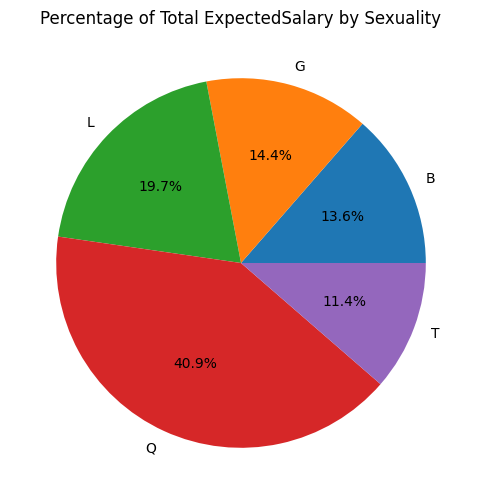

In [11]:
import matplotlib.pyplot as plt

# Tính tổng ExpectedSalary cho mỗi nhóm Sexuality
grouped = df.groupby('Sexuality')['ExpectedSalary'].sum()

# Vẽ biểu đồ pie
plt.figure(figsize=(10, 6))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Percentage of Total ExpectedSalary by Sexuality')
plt.show()

In [12]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('data-midterm.csv')

# Tính độ lớn của mỗi bin
bin_size = (df['TimeToStudy'].max() - df['TimeToStudy'].min()) / 20

print(bin_size)

0.5


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24516\3303706908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['RES'] = tmp['Result'].map(dict_map)


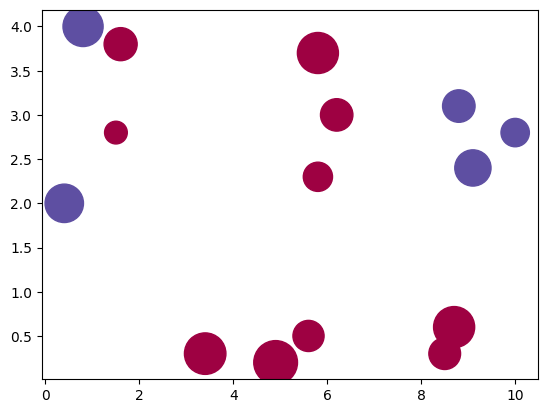

10     764.3
54     991.7
119    544.6
141    872.6
167    521.3
227    834.3
377    502.3
501    417.2
685    875.1
756    547.8
813    566.3
894    442.4
923    891.7
982    681.0
996    267.6
Name: ExpectedSalary, dtype: float64


In [15]:
import matplotlib.pyplot as plt

# Lọc dữ liệu
tmp = df.loc[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

# Ánh xạ Result thành số
dict_map = {
    'NO': 0.0, 'YES': 1.0
}
tmp['RES'] = tmp['Result'].map(dict_map)

# Vẽ biểu đồ phân tán
plt.scatter(x=tmp['TimeToStudy'], y=tmp['ProfessionalScore'], s=tmp['ExpectedSalary'], c=tmp['RES'], cmap="Spectral")
plt.show()
# In 'ExpectedSalary' của các điểm trên biểu đồ
print(tmp['ExpectedSalary'])

In [16]:
# Tính phân vị thứ 25 của 'ProfessionalScore'
q1 = df['ProfessionalScore'].quantile(0.25)

print(q1)

1.0


<Axes: xlabel='ProfessionalScore'>

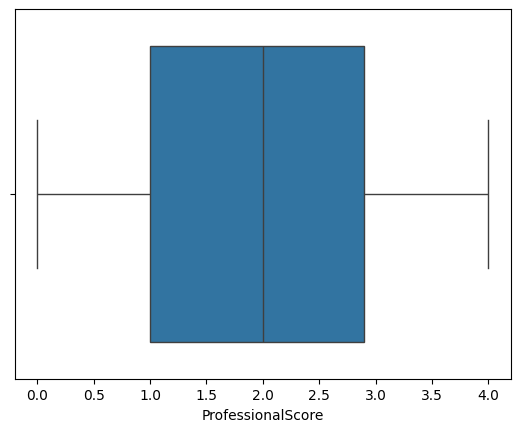

In [17]:
import seaborn as sns

# Vẽ biểu đồ boxplot
sns.boxplot(x=df['ProfessionalScore'])

In [18]:
# Tính giá trị trung bình của 'TimeToStudy' và 'TimeToPlay' trên từng nhóm 'InterviewScore'
mean_values = df.groupby('InterviewScore')[['TimeToStudy', 'TimeToPlay']].mean()

print(mean_values)

                TimeToStudy  TimeToPlay
InterviewScore                         
A                  4.788636    5.100000
B                  5.224375    5.224375
C                  4.955326    5.296564
D                  5.118919    4.952365
F                  5.072727    4.831579


In [19]:
# Tính giá trị trung bình và độ lệch chuẩn của 'TimeToStudy' trên từng nhóm 'InterviewScore'
mean_values = df.groupby('InterviewScore')['TimeToStudy'].mean()
std_values = df.groupby('InterviewScore')['TimeToStudy'].std()

# Tính Coefficient of Variation
cv_values = (std_values / mean_values) * 100

print(cv_values)

InterviewScore
A    53.109645
B    53.968854
C    60.020477
D    55.053535
F    54.909596
Name: TimeToStudy, dtype: float64


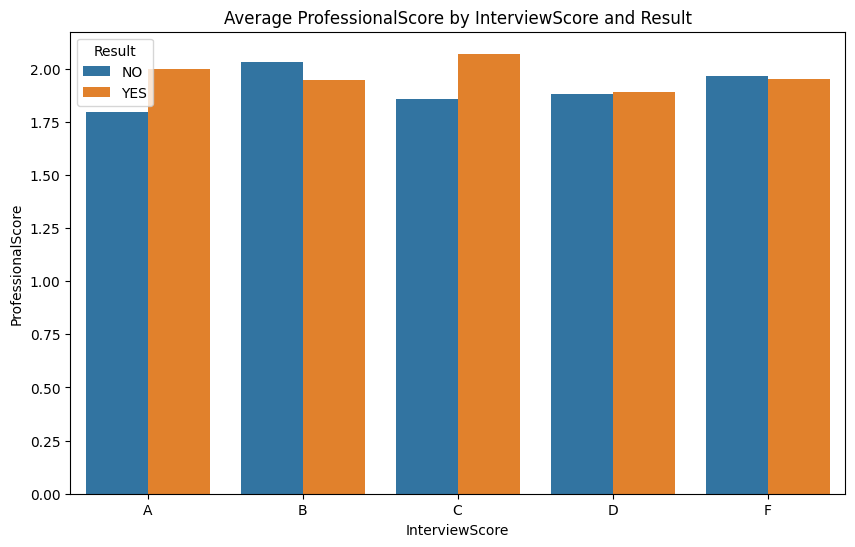

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính trung bình 'ProfessionalScore' theo nhóm 'InterviewScore' trên từng nhóm 'Result'
mean_values = df.groupby(['Result', 'InterviewScore'])['ProfessionalScore'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='InterviewScore', y='ProfessionalScore', hue='Result', data=mean_values)
plt.title('Average ProfessionalScore by InterviewScore and Result')
plt.show()